# Тема: Искусственный нейрон и однослойный перцептрон

Искусственный нейрон — это математическая модель биологического нейрона.

Он получает на вход несколько значений x1, x2, ..., xn,
умножает их на соответствующие веса w1, w2, ..., wn,
добавляет смещение (bias) и пропускает результат через функцию активации.

Формула работы нейрона:
y = f(w1*x1 + w2*x2 + b)

где:
  - w — веса,
  - b — смещение (bias),
  - f — функция активации (например, сигмоида, ReLU, tanh).

Однослойный перцептрон — это простейшая нейронная сеть, состоящая из одного слоя искусственных нейронов.

Каждый нейрон принимает на вход несколько признаков и выдает один выход.

Если нейронов несколько, то их выходы формируют вектор — предсказание сети.

Перцептрон способен решать задачи линейной классификации — то есть разделять данные, которые можно отделить прямой или гиперплоскостью.

Однако он не может решить задачи, где классы разделяются нелинейно (например, логическую операцию XOR).

Правило обучения перцептрона:

w = w + η * (y_true - y_pred) * x
где:
  - η — скорость обучения,
  - y_true — истинное значение,
  - y_pred — предсказанное.

Таким образом, перцептрон корректирует веса, если предсказание неверное, постепенно улучшая свою способность различать классы.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def dummy(z):
    return z

def one_stair(z):
    return z >= 0

def th(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def arctg(z):
    return np.arctan(z)


def neuron_output(X, w, b, activation_func):
    z = np.dot(X, w) + b
    return activation_func(z)

sigmoid.__name__ = 'сигмойда'
dummy.__name__ = 'тождественная'
one_stair.__name__ = 'единичная ступенька'
th.__name__ = 'гиперболический тангенс'
arctg.__name__ = 'арктангенс'

In [3]:
SIZE = 100
SEED = 45

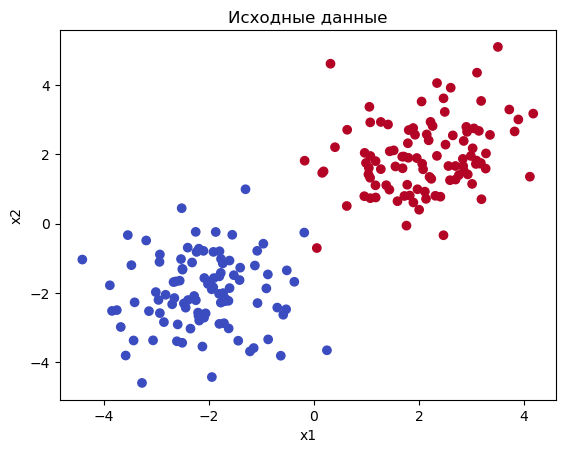

In [4]:
np.random.seed(SEED)

class_1 = np.random.randn(SIZE, 2) + np.array([-2, -2])
class_2 = np.random.randn(SIZE, 2) + np.array([2, 2])

X = np.vstack((class_1, class_2))
y = np.array([0]*SIZE + [1]*SIZE)


w = np.random.randn(2)
b = 0.0
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.title('Исходные данные')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [5]:
def plot_decision_boundary(w, b, f):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = neuron_output(np.c_[xx.ravel(), yy.ravel()], w, b, f)
    
    if f in (sigmoid, one_stair):
        Z_binary = (Z > 0.5).astype(int)
        Z_binary = Z_binary.reshape(xx.shape)
    else:
        Z_binary = (Z >=0).astype(int)
        Z_binary = Z_binary.reshape(xx.shape) 
    
    plt.contourf(xx, yy, Z_binary, levels=[-0.5, 0.5, 1.5], alpha=0.4, cmap='coolwarm_r')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(f'Граница решений однослойного перцептрона с ф. активации {f.__name__}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

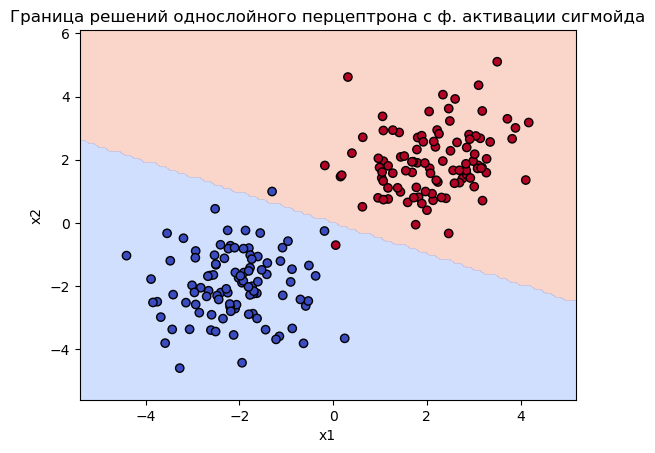

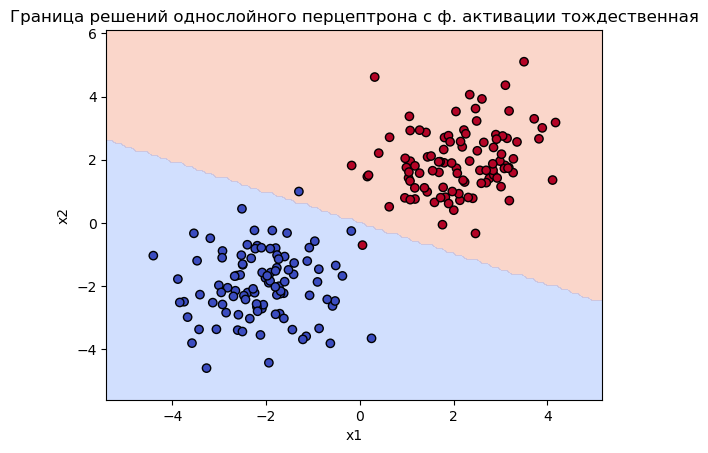

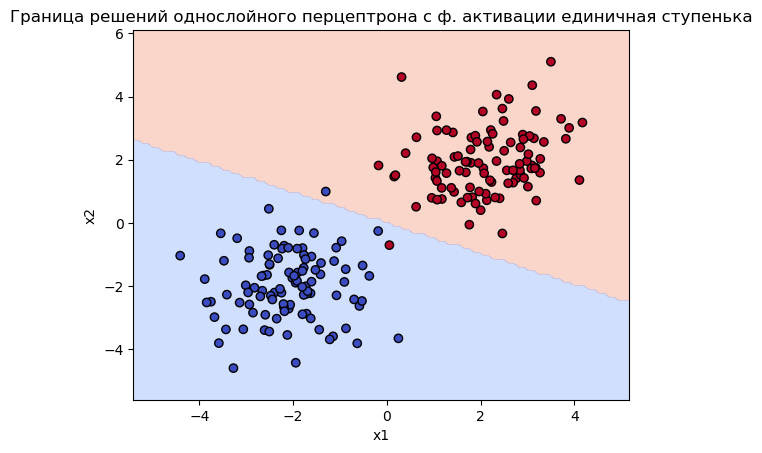

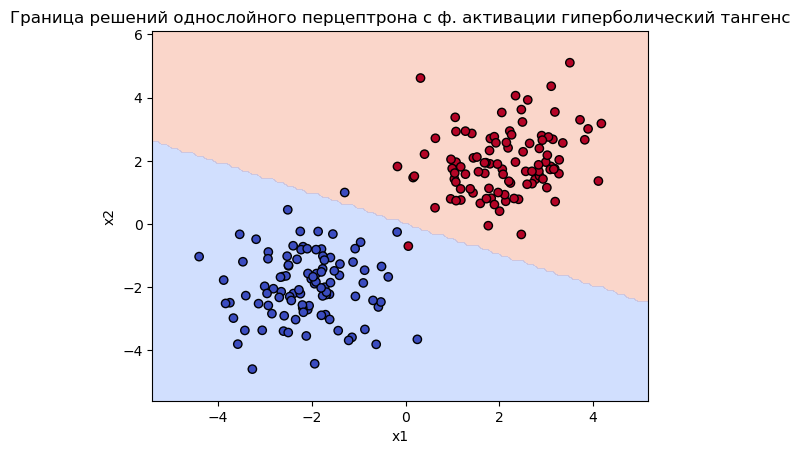

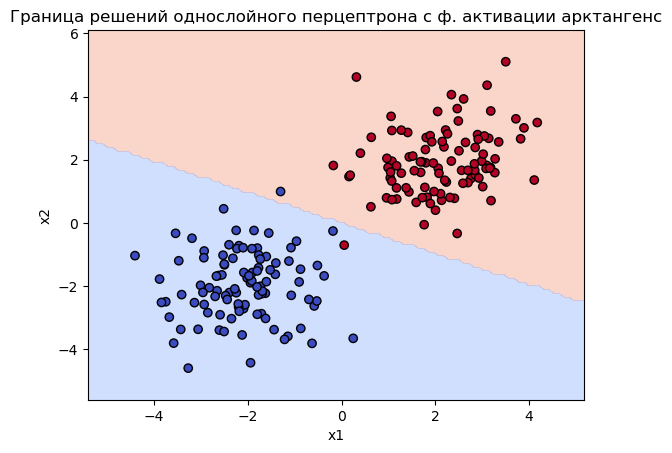

In [6]:
for f in (sigmoid, dummy, one_stair, th, arctg):
    plot_decision_boundary(w, b, f)
   

In [7]:
LEARNING_RATE = 0.1
EPOCHS = 10

Эпоха 1/10 — точность: 0.9950, ф. активации сигмойда
Эпоха 2/10 — точность: 0.9900, ф. активации сигмойда
Эпоха 3/10 — точность: 0.9950, ф. активации сигмойда
Эпоха 4/10 — точность: 1.0000, ф. активации сигмойда
Эпоха 5/10 — точность: 1.0000, ф. активации сигмойда
Эпоха 6/10 — точность: 1.0000, ф. активации сигмойда
Эпоха 7/10 — точность: 1.0000, ф. активации сигмойда
Эпоха 8/10 — точность: 1.0000, ф. активации сигмойда
Эпоха 9/10 — точность: 1.0000, ф. активации сигмойда
Эпоха 10/10 — точность: 1.0000, ф. активации сигмойда


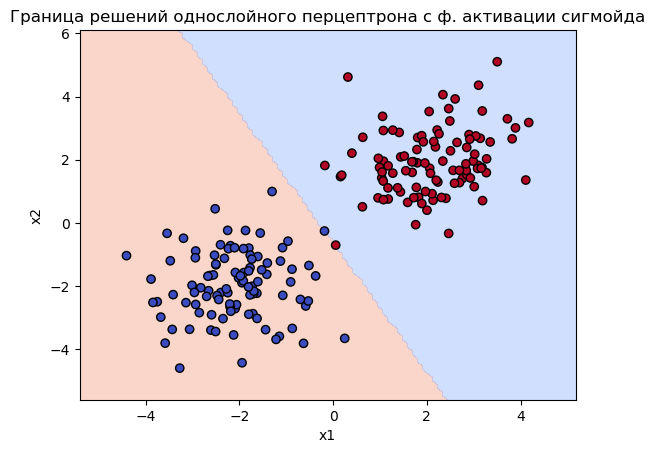

Эпоха 1/10 — точность: 0.9950, ф. активации тождественная
Эпоха 2/10 — точность: 0.9900, ф. активации тождественная
Эпоха 3/10 — точность: 0.9950, ф. активации тождественная
Эпоха 4/10 — точность: 1.0000, ф. активации тождественная
Эпоха 5/10 — точность: 1.0000, ф. активации тождественная
Эпоха 6/10 — точность: 1.0000, ф. активации тождественная
Эпоха 7/10 — точность: 1.0000, ф. активации тождественная
Эпоха 8/10 — точность: 1.0000, ф. активации тождественная
Эпоха 9/10 — точность: 1.0000, ф. активации тождественная
Эпоха 10/10 — точность: 1.0000, ф. активации тождественная


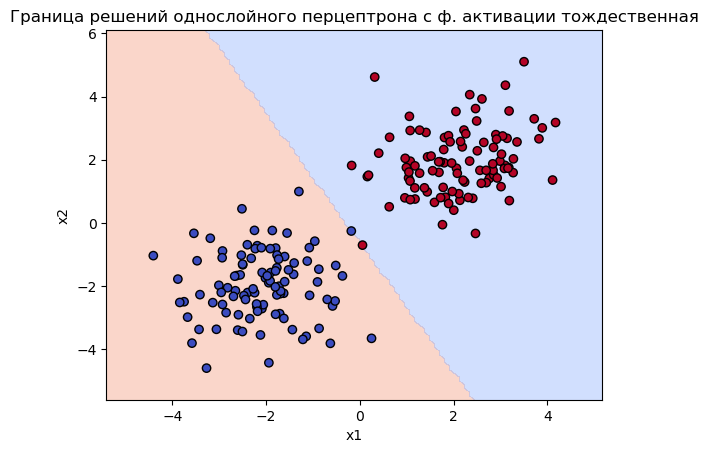

Эпоха 1/10 — точность: 0.9950, ф. активации единичная ступенька
Эпоха 2/10 — точность: 0.9900, ф. активации единичная ступенька
Эпоха 3/10 — точность: 0.9950, ф. активации единичная ступенька
Эпоха 4/10 — точность: 1.0000, ф. активации единичная ступенька
Эпоха 5/10 — точность: 1.0000, ф. активации единичная ступенька
Эпоха 6/10 — точность: 1.0000, ф. активации единичная ступенька
Эпоха 7/10 — точность: 1.0000, ф. активации единичная ступенька
Эпоха 8/10 — точность: 1.0000, ф. активации единичная ступенька
Эпоха 9/10 — точность: 1.0000, ф. активации единичная ступенька
Эпоха 10/10 — точность: 1.0000, ф. активации единичная ступенька


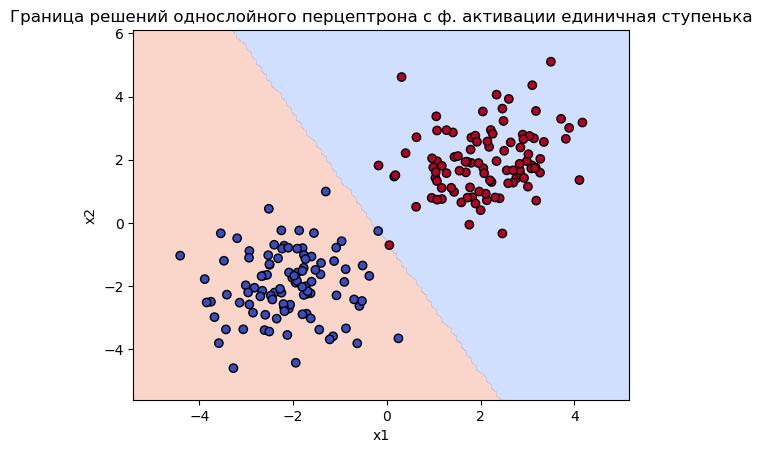

Эпоха 1/10 — точность: 0.9950, ф. активации гиперболический тангенс
Эпоха 2/10 — точность: 0.9900, ф. активации гиперболический тангенс
Эпоха 3/10 — точность: 0.9950, ф. активации гиперболический тангенс
Эпоха 4/10 — точность: 1.0000, ф. активации гиперболический тангенс
Эпоха 5/10 — точность: 1.0000, ф. активации гиперболический тангенс
Эпоха 6/10 — точность: 1.0000, ф. активации гиперболический тангенс
Эпоха 7/10 — точность: 1.0000, ф. активации гиперболический тангенс
Эпоха 8/10 — точность: 1.0000, ф. активации гиперболический тангенс
Эпоха 9/10 — точность: 1.0000, ф. активации гиперболический тангенс
Эпоха 10/10 — точность: 1.0000, ф. активации гиперболический тангенс


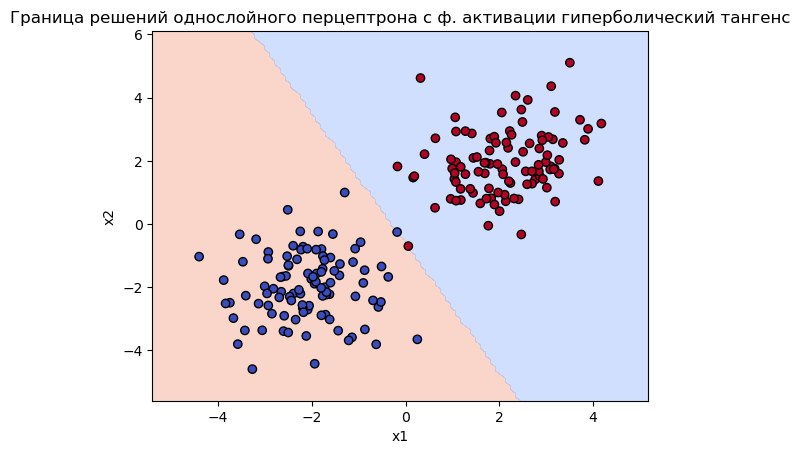

Эпоха 1/10 — точность: 0.9950, ф. активации арктангенс
Эпоха 2/10 — точность: 0.9900, ф. активации арктангенс
Эпоха 3/10 — точность: 0.9950, ф. активации арктангенс
Эпоха 4/10 — точность: 1.0000, ф. активации арктангенс
Эпоха 5/10 — точность: 1.0000, ф. активации арктангенс
Эпоха 6/10 — точность: 1.0000, ф. активации арктангенс
Эпоха 7/10 — точность: 1.0000, ф. активации арктангенс
Эпоха 8/10 — точность: 1.0000, ф. активации арктангенс
Эпоха 9/10 — точность: 1.0000, ф. активации арктангенс
Эпоха 10/10 — точность: 1.0000, ф. активации арктангенс


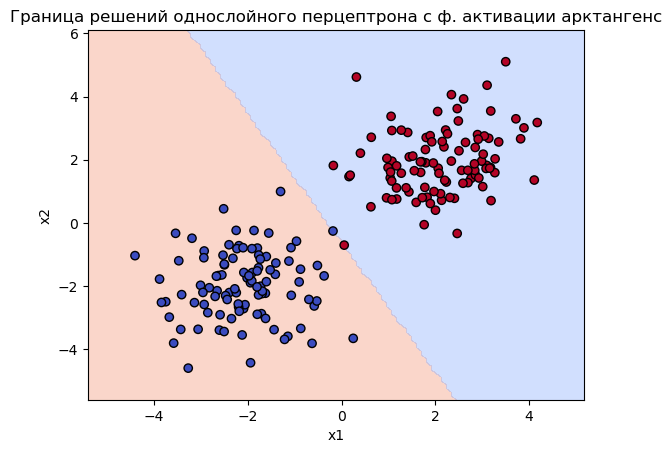

In [8]:
for f in (sigmoid, dummy, one_stair, th, arctg):
    w = np.array([0., 0.])
    b = 0.0
    losses = []
    
    for epoch in range(EPOCHS):
        for i in range(len(X)):
            z = np.dot(X[i], w) + b
            y_pred_prob = f(z)

            if f in (sigmoid, one_stair):
                y_pred = 1 if y_pred_prob >= 0.5 else 0
            else:
                y_pred = 1 if y_pred_prob >= 0 else 0
            
            error = y[i] - y_pred
            w += LEARNING_RATE * error * X[i]
            b += LEARNING_RATE * error
        
        preds = []
        for x in X:
            prob = f(np.dot(x, w) + b)
            if f in (sigmoid, one_stair):
                preds.append(1 if prob >= 0.5 else 0)
            else:
                preds.append(1 if prob >= 0 else 0)
        preds = np.array(preds)
        
        acc = (preds == y).mean()
        losses.append(1 - acc)
        print(f"Эпоха {epoch+1}/{EPOCHS} — точность: {acc:.4f}, ф. активации {f.__name__}")
    
    plot_decision_boundary(w, b, f)

1. Что делает функция активации в искусственном нейроне2. Чем отличается искусственный нейрон от однослойного перцептрона?
3. Какое правило используется для обучения перцептрона?
4. Почему однослойный перцептрон не может решить задачу XOR?
5. Что произойдет, если изменить функцию активации с сигмоиды на ReLU?


1. Применяется к взвешенной сумме + смещению.
2. Искусственный нейрон это просто нечто, что суммирует в себе входы, добавляет смещение, применяет функцию активации. Однослойный перцептрон это архитектура нейросети с одним слоем, применяется для линейной классификации.
3. Нужно подобрать веса и смещения такие, чтобы sing(w0 +w1x1 +w2x2 +...+wnxn) как можно чаще совпадал с истинным y. Подбирать можно с помощью градиентного спуска. Идем по каждому x, если классифицирован правильно, то ничего не происходит, иначе прибавляем  η · yₙ · xₙ к весам и η · yₙ к смещению.  
4. Данные не разделимы линейно.
5. Нарушится интерпретируемость, так как сигмойду можно интерпретировать как вреоятность, а RELU неограничена сверху. Но RELU быстрее рассчитывается.
